iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
0.03216666666666666


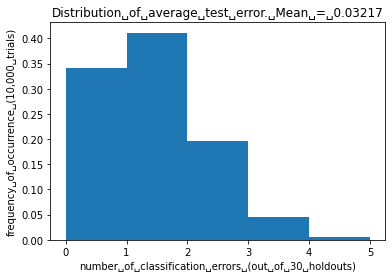

In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.io as sio

labels_to_LS = {'setosa' : -1, 'versicolor' : 0, 'virginica' : 1}


d = sio.loadmat('fisheriris.mat')
X = d['meas']
y = np.array([labels_to_LS[label[0][0]] for label in d['species']])

# N = number of random trials
# errs is used to store error values
# num_train = size of the training set of each type 
N = 10000
errs = np.zeros(N)
num_train = 40


for i in range(N):
  if i % (N // 10) == 0:
    print("iteration", i)
  # ih is the set of hold-out indices 
  it = np.zeros(0, dtype=np.intp)
  # it is the set of training indices 
  ih = np.zeros(0, dtype=np.intp)
  for label_type in range(3):
    # randomly pick training and hold-out sets
    r = np.random.permutation(50)
    it = np.concatenate((it, 50 * label_type + r[:num_train])) 
    ih = np.concatenate((ih, 50 * label_type + r[num_train:]))
  # train the classifier
  Xt = X[it, :]
  yt = y[it]
  wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt
  # use the classifier on the hold-out set
  Xh = X[ih, :]
  yh = y[ih]
  yhat = Xh@wt
  # apply rounding to find labels
  for j in range(np.size(yhat)): 
    if np.abs(yhat[j]) < 0.5:
      yhat[j] = 0.0 
    else:
      yhat[j] = np.sign(yhat[j]) 

  errs[i] = np.mean(yhat != yh)


avg_error = np.mean(errs) 
print(avg_error)
# plot histogram of errors and mean value
plt.hist(errs * 30, density=True, bins=np.arange(6)) 
plt.xlabel('number␣of␣classification␣errors␣(out␣of␣30␣holdouts)') 
plt.ylabel('frequency␣of␣occurrence␣(10,000␣trials)') 
plt.title('Distribution␣of␣average␣test␣error.␣Mean␣=␣{:.5f}'.format(avg_error)) 
plt.show()